In [3]:
import time
import qpo_search as q
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
import os 
import glob
from scipy import stats
from scipy import optimize
from astropy.io import fits
from scipy.optimize import curve_fit
from astropy.io import ascii
from astropy.table import Table
import csv
import math
import stingray
import lightcurve
from stingray import Lightcurve
#from stingray import Powerspqpoectrum
from stingray import AveragedPowerspectrum
from stingray import Crossspectrum
from stingray.exceptions import StingrayError
from stingray import AveragedCrossspectrum
from more_itertools import locate
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import scipy
from scipy import stats
from scipy import optimize
from scipy.stats import f
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import erfinv, erf
#from sklearn import preprocessing
from pynverse import inversefunc
import pynverse
import warnings
warnings.filterwarnings('ignore')
from concurrent.futures import ThreadPoolExecutor
from joblib import Parallel, delayed
from multiprocessing import Process
import threading
import multiprocessing as mp
from multiprocessing import pool
from functools import partial

In [768]:
#defining the modulation function
#inputs:
# mu=modulation factor , p=polarisation degree, psi=polarisation angle ,phi=modulation angle

def mod_function(mu,p,psi,phi):
    mod_func=[]
    f= (1/np.pi) * (1 + (mu * p * np.cos(2 * (psi-phi)) ) )
    mod_func.append(f)
    return f


#defining the cdf
def mod_function_cdf(mu,p,psi,phi):
    cdf_array=[]
    
    for i in phi:
        cdf=(1/np.pi) * (i -  (((mu*p) / 2) * np.sin(2*psi - 2*i)) )
        cdf_array.append(cdf)
    
    cdf_norm=[]
    for d in cdf_array:
        norm=(d-np.min(cdf_array))/(np.max(cdf_array)-np.min(cdf_array))
        cdf_norm.append(norm)
   



def mod_function_cdf_redo(mu,p,psi,phi):
    cdf_array=[]
    
    for i in phi:
        cdf=(1/np.pi) * (i +  ((mu*p) / 2)) * (np.sin(2*i-2*psi) +np.sin(2*psi)) 
        cdf_array.append(cdf)
    
    cdf_norm=[]
    for d in cdf_array:
        norm=(d-np.min(cdf_array))/(np.max(cdf_array)-np.min(cdf_array))
        cdf_norm.append(norm)
    
    
    #cdf= (cdf - np.min(phi)) /(np.max(phi)-np.min(phi))
    #cdf=preprocessing.normalise(cdf)
    #cdf=cdf*norm_factor
    #cdf=cdf/np.sum(cdf)
    
    #return cdf_array
    return cdf_norm
    



In [ ]:
DF(phi) = { phi + 0.5*mu*PD * [ sin(2phi-2PA) + sin(2PA) ] }



In [754]:
#assume mu is corresponding to the event energy
#assume p and psi are constant

#defining the things other than phi that we need for the function

with fits.open('/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits') as hdu:
    data=hdu[1].data
    mue_txt=np.loadtxt('/home/c2032014/PhD/muE.txt')
    PI=data.field('PI')
    mue=mue_txt[:,2]
    modulation_factor=[]
    for i in PI:
        modulation_factor.append(mue[int(i)])
        
    p=4
    #print(p)
    psi=np.radians(-18)
    
s=np.radians(-18)
mod_angle_list=(np.linspace(np.radians(0),np.radians(180),100))
#print(np.degrees(mod_angle_list))
#modulation_factor=[1/g for g in modulation_factor]
#print(modulation_factor[500])

In [756]:
from sympy import symbols, solve

# Define the variable and the function
x, y = symbols('x y')
original_function = 2*x + 3

# Solve for x in terms of y to find the inverse function
inverse_function = solve(original_function - y, x)[0]

# Print the original and inverse functions
print(f"Original function: {original_function}")
print(f"Inverse function: {inverse_function}")


Original function: 2*x + 3
Inverse function: y/2 - 3/2


[0.0, 0.022569348409094636, 0.04449979170047977, 0.06574369692182244, 0.08625619556728853, 0.10599536424717948, 0.1249223934986261, 0.14300174405759825, 0.16020128996297694, 0.1764924479164623, 0.1918502923774263, 0.20625365592926842, 0.21968521451313094, 0.23213155718576978, 0.24358324012068966, 0.25403482463509963, 0.2634848990895703, 0.2719360845722065, 0.2793950243444512, 0.28587235709101594, 0.2913826740816527, 0.29594446041726047, 0.29958002059690797, 0.3023153887054886, 0.304180223583648, 0.30520768940210213, 0.3054343221212257, 0.3048998823736358, 0.30364719536215684, 0.30172197841784426, 0.2991726569124278, 0.2960501692664306, 0.2924077618381288, 0.2883007745192594, 0.28378641790080805, 0.2789235429061514, 0.2737724038191598, 0.2683944156614622, 0.2628519068958305, 0.2572078684514581, 0.2515257000817206, 0.24586895507574502, 0.2403010843517459, 0.23488518096257166, 0.2296837260422493, 0.22475833721651, 0.22016952049035798, 0.21597642661174343, 0.21223661289237727, 0.2090058114

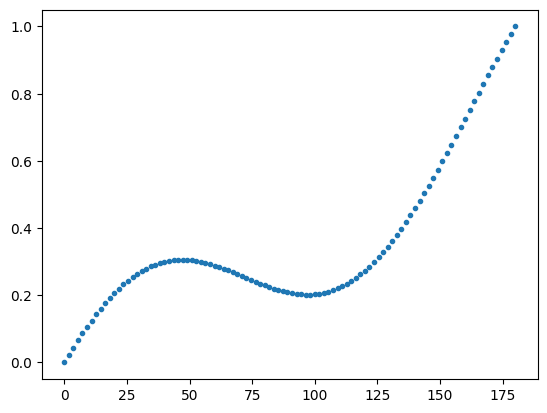

0.0
1.0


In [592]:
cdf_func=mod_function_cdf(modulation_factor[-1],p,psi,mod_angle_list)
print(cdf_func)
plt.figure()
plt.plot(np.degrees(mod_angle_list),cdf_func,'.')
#plt.axvline(x=2.6874965)
#plt.axhline(y = 0.8)
plt.show()


print(np.min(cdf_func))
print(np.max(cdf_func))

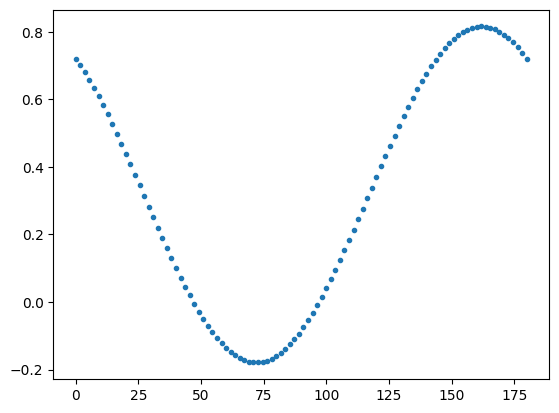

-0.17899355624810126
0.8157636037953995


In [579]:
cdf_func=mod_function(modulation_factor[-1],p,psi,mod_angle_list)
#print(cdf_func)
plt.figure()
plt.plot(np.degrees(mod_angle_list),cdf_func,'.')
#plt.axvline(x=2.6874965)
#plt.axhline(y = 0.8)
plt.show()


print(np.min(cdf_func))
print(np.max(cdf_func))

In [698]:
np.random.uniform(0,1)

0.5815501140015282

In [12]:
#testing we get back the mod function from the cdf

def cdf_test(p,psi,modulation_factor):
        #polarisation properties
        p=p
        psi=np.radians(psi)
        mu=modulation_factor

        mod_angle_array=[]
        
        
        #cdf=(lambda i: (1/np.pi) * (i - (((modulation_factor*p) / 2) * np.sin(2*psi - 2*i)) ) ) old cdf formula
        
        #cdf=(lambda i: (1/np.pi) * (i +  (modulation_factor*p*0.5) * (np.sin((2*i)-(2*psi)) + np.sin(2*psi))))
        phi_min=np.radians(-90)
        phi_max=np.radians(90)
        cdf=(lambda phi: (1/np.pi)*(phi - phi_min + 0.5*mu*p * ( np.sin( 2*phi - 2*psi ) - np.sin( 2*phi_min - 2*psi )) ))
        
        cdf_min=cdf(np.radians(-90))
        #print(cdf_min)
        cdf_max=cdf(np.radians(90))
    
        mod_angle_list=(np.linspace(np.radians(-90),np.radians(90),100))
        cdf_plot=[]
        for i in mod_angle_list:
            cdf_plot.append(cdf(i))
        
        
        
    
    
        plt.figure()
        plt.plot(np.degrees(mod_angle_list),cdf_plot,'.')
        plt.show()
        random_array=[]
        #plt.figure()
        for i in range(100000):
            #plt.figure()
            random=np.random.uniform(cdf_min,cdf_max)
            random_array.append(random)
            #print('random selection',random)
            mod_angle_array.append(inversefunc(cdf, y_values=random))
            
            #plt.figure()
            #plt.plot(mod_angle_array[i],random,color='red')
            #plt.plot(np.degrees(mod_angle_list),cdf_plot,'.')
            #plt.plot(mod_angle_array[i],random,color='red')
            #plt.axvline(x=np.degrees(mod_angle_array[i]))
        
            #plt.axhline(y = random)
            
            #plt.show()
            
            #print('mod angle recovered',np.degrees(mod_angle_array[i]))
       
    
    


        #print(len(mod_angle_array))
        #np.savetxt('/home/c2032014/PhD/Results/new_null/'+str(source_name)+'_'+str(data_number)+'_.txt',mod_angle_array)
        #np.save(f'/home/c2032014/PhD/Results/new_null/{source_name}_{data_number}_newsave.npy',mod_angle_array)
        plt.figure()
        plt.hist(np.degrees(mod_angle_array),bins=100)
        plt.show()
        
        plt.figure()
        plt.plot(np.degrees(mod_angle_array),random_array,'.')
        plt.show()
        #print(mod_angle_array)
        
        # Sample array
#my_array = [1, 3, 5, 7, 9]

# Define minimum and maximum values
#minimum_value = 4
#maximum_value = 8

# Check if any values in the array are within the specified range
        if any(25 <= x <= 40 for x in np.degrees(mod_angle_array)):
            print(f"At least one value in the array is between min and max.")
        else:
            print(f"No values in the array are between min and max.")

        

        


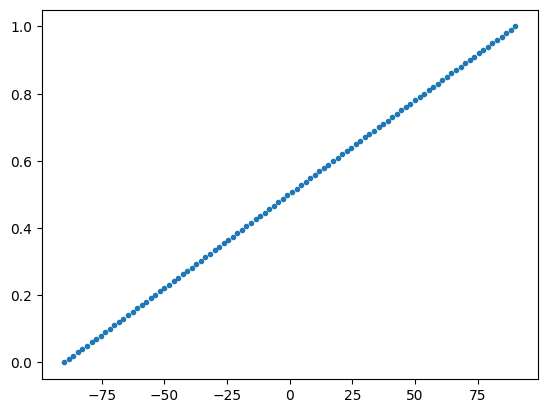

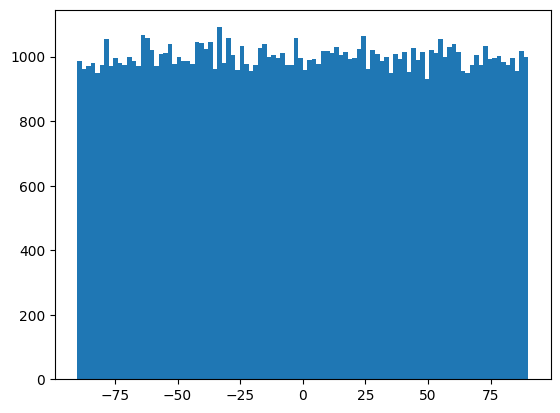

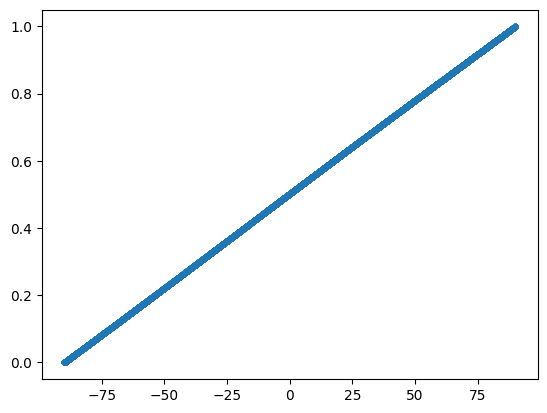

At least one value in the array is between min and max.


In [13]:
cdf_test(0.04,-18,0.3)

#So if were using the individual modulation factor for each photon, does this mean that we have a new cdf function for each event which we want to generate a modulation angle for?

In [63]:
#random number between 0 and 1

random=np.random.uniform(0,1)

In [229]:
#example of inv code!
mu=modulation_factor[-1]


cube = (lambda i: (1/np.pi) * (i -  (((mu*p) / 2) * np.sin(2*psi - 2*i)) ))
invcube = inversefunc(cube, y_values=0.148, domain=[np.radians(0),np.radians(180)])
invcube


array(1.6948736)

## I need to figure out a way to input the normalised function into the inverse code so i can select the y value based on the 0 to 1 range!

## Maybe i dont have to normalise if i set the y value to select between just the min and max value!


In [37]:
#Learning about paralellisation:

from multiprocessing import Process

def numbers(start_num):
    for i in range(5):
        print(start_num+i, end=' ')

if __name__ == '__main__':
    p1 = Process(target=numbers, args=(1,))
    p2 = Process(target=numbers, args=(10,))
    p1.start()
    p2.start()
    # wait for the processes to finish
    p1.join()
    p2.join()

1 2 103  411  125  13 14 

In [133]:
from multiprocessing import Pool
import time
import math

N = 5000000

def cube(x):
    return math.sqrt(x)

if __name__ == "__main__":
    with Pool() as pool:
        result = pool.map(cube, range(10,N))
    print("Program finished!")


Program finished!


# The following function is going to generate a modulation angle per event based on the calculated cdf function based on the modultion factor calculated from its PI value.



In [103]:
def new_null_func(source_name,data_number,file,mue_file,Pmin,Pmax,p,psi):
    with fits.open(file) as hdu:
        data=hdu[1].data[:1000]
        
        #index_qual=list(locate(data.field('QUAL'), lambda x: x==1))  #quality factor cut
        data=data[list(locate(data.field('QUAL'), lambda x: x==1))]
        
        #index_energy=list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))  #energy cut 
        data=data[list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))]
        
        
        #determine mod factor per event
        
        #PI=data.field('PI')
        mue=np.loadtxt(mue_file)[:,2]
        modulation_factor=np.array([mue[int(i)] for i in data.field('PI')])


        #polarisation properties
        p,psi=p,np.radians(psi)

 
        # Calculate cdf_min and cdf_max for the entire array
        cdf_min_all = (1 / np.pi) * (np.radians(0) - ((modulation_factor * p) / 2) * np.sin(2 * psi))
        cdf_max_all = (1 / np.pi) * (np.radians(180) - ((modulation_factor * p) / 2) * np.sin(2 * psi))

        # Generate random values for the entire array
        random_all = np.random.uniform(cdf_min_all, cdf_max_all, size=len(modulation_factor))

        # Define the cdf function for the entire array
        def cdf_func(i,mod_fac):
            return (1 / np.pi) * (i - ((mod_fac * p) / 2) * np.sin(2 * psi - 2 * i))


        
        # Calculate mod_angle_array for the entire array
       # mod_angle_array = inversefunc(cdf_func, y_values=random_all)
        mod_angle_array=np.array([inversefunc(cdf_func, args=(mod_fac,), y_values=random_val) for mod_fac, random_val in zip(modulation_factor, random_all)])


            

         


        #print(len(mod_angle_array))
        np.savetxt('/home/c2032014/PhD/Results/new_null/'+str(source_name)+'_'+str(data_number)+'_.txt',mod_angle_array)
        
        
        


In [22]:
start=time.process_time()
new_null_func('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
stop=time.process_time()
print(stop-start)

0.1543032310000001


start=time.process_time()
new_null_par1('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
stop=time.process_time()
print(stop-start)

In [ ]:
start=time.process_time()
new_null_new_par2('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
stop=time.process_time()
print(stop-start)

In [17]:
def new_null_new_par2(source_name,data_number,file,mue_file,Pmin,Pmax,p,psi):
    with fits.open(file) as hdu:
        data=hdu[1].data[:1000]
        
        #index_qual=list(locate(data.field('QUAL'), lambda x: x==1))  #quality factor cut
        data=data[list(locate(data.field('QUAL'), lambda x: x==1))]
        
        #index_energy=list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))  #energy cut 
        data=data[list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))]
        
        
        #determine mod factor per event
        
        #PI=data.field('PI')
        mue=np.loadtxt(mue_file)[:,2]
        #mue=mue_txt[:,2]

        modulation_factor=np.array([mue[int(i)] for i in data.field('PI')])
        #for i in data.field('PI'):
        #    modulation_factor.append(mue[int(i)])



        #polarisation properties
        p,psi=p,np.radians(psi)
             
        # Calculate cdf_min and cdf_max for the entire array
        cdf_min_all = (1 / np.pi) * (np.radians(0) - ((modulation_factor * p) / 2) * np.sin(2 * psi))
        cdf_max_all = (1 / np.pi) * (np.radians(180) - ((modulation_factor * p) / 2) * np.sin(2 * psi))

        # Generate random values for the entire array
        random_all = np.random.uniform(cdf_min_all, cdf_max_all, size=len(modulation_factor))

        # Define the cdf function for the entire array
        def cdf_func(i,mod_fac):
            return (1 / np.pi) * (i - ((mod_fac * p) / 2) * np.sin(2 * psi - 2 * i))

        #mod_angle_array=np.array([inversefunc(cdf_func, args=(mod_fac,), y_values=random_val) for mod_fac, random_val in zip(modulation_factor, random_all)])


        
        
        
        def compute_mod_angle(mod_fac, random_val):
            return inversefunc(cdf_func, args=(mod_fac,), y_values=random_val)

        mod_angle_array = np.array(Parallel(n_jobs=8)(delayed(compute_mod_angle)(mod_fac, random_val) for mod_fac, random_val in zip(modulation_factor, random_all)))



         


        #print(len(mod_angle_array))
        np.savetxt('/home/c2032014/PhD/Results/new_null/'+str(source_name)+'_'+str(data_number)+'_.txt',mod_angle_array)
        

In [563]:
def new_null(source_name,data_number,file,mue_file,Pmin,Pmax,p,psi):
    with fits.open(file) as hdu:
        data=hdu[1].data[:1000000]
        
        #index_qual=list(locate(data.field('QUAL'), lambda x: x==1))  #quality factor cut
        #data=data[list(locate(data.field('QUAL'), lambda x: x==1))]
        
        #index_energy=list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))  #energy cut 
        #data=data[list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))]
        
        
        #determine mod factor per event
        
        #PI=data.field('PI')
        mue=np.loadtxt(mue_file)[:,2]
        #mue=mue_txt[:,2]

        modulation_factor=np.array([mue[int(i)] for i in data.field('PI')])


        #polarisation properties
        p=p
        psi=np.radians(psi)

        mod_angle_array=[]
        
        #print('ere we go')
        
        for mod_fac in modulation_factor:
            #print(mod_fac)
            #print(p)
            #print(psi)
            cdf=(lambda i: (1/np.pi) * (i + (((mod_fac*p) / 2) * np.sin(2*psi - 2*i)) ) ) 
            cdf_min=0#cdf(np.radians(0))
            cdf_max=cdf(np.radians(180))
            random=np.random.uniform(cdf_min,cdf_max)
            #print(cdf_min)
            #print(cdf_max)
            #ma=inversefunc(cdf, y_values=cdf_max/2)
            #print(ma)
            mod_angle_array.append(inversefunc(cdf, y_values=random))
        #print(mod_angle_array)
         


        #print(len(mod_angle_array))
        np.savetxt('/home/c2032014/PhD/Results/new_null/'+str(source_name)+'_'+str(data_number)+'_.txt',mod_angle_array)
        np.save(f'/home/c2032014/PhD/Results/new_null/{source_name}_{data_number}_newsave.npy',mod_angle_array)
        plt.figure()
        plt.hist(np.degrees(mod_angle_array),bins=1000)
        plt.show()
        

        

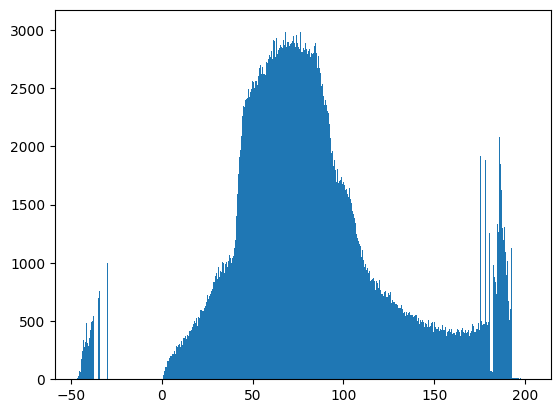

189.47215389199982


In [564]:
start=time.process_time()
new_null('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
stop=time.process_time()
print(stop-start)

In [700]:
 #ORIGINAL
def cdf_func(mod_factor_split,p,psi,source_name,data_number):
    #print(mod_factor_split)
    #print(mod_factor_split[1])
    #print('kms')
    #print(mod_factor_split[0])
    p,psi=p,psi
    mod_angle_array=[]

    for mod_fac in mod_factor_split[0]:
        #print('mod fac',mod_fac)
        #print(mod_factor_split[0])
        #print(mod_fac)
        #print(p)
        #rint(psi
        #print(np.degrees(psi))
        cdf=(lambda i: (1/np.pi) * (i -  (((mod_fac*p) / 2) * np.sin(2*psi - 2*i)) ) ) 
        #print(mod_fac)
        cdf_min=cdf(np.radians(0))
        #print(cdf_min)
        cdf_max=cdf(np.radians(180))
        #print(cdf_max)
        random=np.random.uniform(cdf_min,cdf_max)
        ma=(inversefunc(cdf, y_values=cdf_max/2))
        #print(ma)
        mod_angle_array.append(inversefunc(cdf, y_values=cdf_max/2))
        
    #print(mod_angle_array)
        
        
        #cdf=(lambda i: (1/np.pi) * (i -  (((mod_fac*p) / 2) * np.sin(2*psi - 2*i)) ) ) 
        #cdf_min,cdf_max=cdf(np.radians(0)),cdf(np.radians(180))
       # random=np.random.uniform(cdf_min,cdf_max)
        #print(cdf_max)
       ## ma=(inversefunc(cdf, y_values=cdf_max/2))
       # print(ma)
      # mod_angle_array.append(inversefunc(cdf, y_values=cdf_max/2))
    
    #print(mod_angle_array)
        #print(mod_factor_split[1])
    np.save(f'/home/c2032014/PhD/Results/new_null/{source_name}_{data_number}_{mod_factor_split[1]}_mod_angles_newnull.npy',mod_angle_array)
    #print('done')
   # np.save(f'/home/c2032014/PhD/Results/new_null/{mod_fac[1]}_mod_angles_newnull.npy',mod_angle_array)
    
def new_null_original_par2(source_name,data_number,file,mue_file,Pmin,Pmax,p,psi,cpu_num):
    with fits.open(file) as hdu:
        data=hdu[1].data[:10000]
        
        #data=data[list(locate(data.field('QUAL'), lambda x: x==1))]
        #data=data[list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))]
        
        #determine mod factor per event
        
        #PI=data.field('PI')
        mue=np.loadtxt(mue_file)[:,2]
        modulation_factor=np.array([mue[int(i)] for i in data.field('PI')])
        print('mod factor',modulation_factor)
        
        #polarisation properties
        p,psi=p,np.radians(psi)

        mod_factor_split=np.array_split(modulation_factor,cpu_num)
        #print('mod factor split',mod_factor_split)
       
        split_tag=list(range(len(mod_factor_split)))
        mod_factor_split_tagged=list(zip(mod_factor_split,split_tag))
        #print('mod split tag ',mod_factor_split_tagged)
        #print('')
        #print('')
        #print('mod split tag 1',mod_factor_split_tagged[1])
        cdf_func_partial=partial(cdf_func,p=p,psi=psi,source_name=source_name,data_number=data_number)
        

        
        
        with Pool(processes=cpu_num) as pool:
            result = pool.map(cdf_func_partial, mod_factor_split_tagged)

In [4]:
print(np.array(range(6)))

[0 1 2 3 4 5]


In [701]:
start=time.process_time()
new_null_original_par2('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18,6)
stop=time.process_time()
print(stop-start)

mod factor [0.06472739 0.36566678 0.30120802 ... 0.33147737 0.21009068 0.19424   ]
0.12589531899993744


In [519]:
start=time.process_time()
new_null_original_par2('cygx1_may','2','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det2_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18,6)
stop=time.process_time()
print(stop-start)

KeyboardInterrupt: 

In [515]:
start=time.process_time()
new_null_original_par2('cygx1_may','3','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det3_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18,6)
stop=time.process_time()
print(stop-start)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




1.6535850980001214


[array(0.84763735), array(0.96078482), array(0.73307765), array(2.07271659), array(2.22675435), array(0.90505637), array(0.86080189), array(2.07271659), array(1.0245784), array(2.09207874), array(0.81840052), array(0.77190476), array(0.77882672), array(1.98588886), array(0.80802706), array(2.09207874), array(0.78311764), array(2.11052952), array(0.86456749), array(2.03117721), array(1.04737349), array(0.76525387), array(0.8818795), array(0.91228338), array(2.16072953), array(0.87718562), array(2.20291128), array(0.81486497), array(0.88691317), array(0.91228338), array(2.05242021), array(0.80635882), array(2.14481986), array(0.83950962), array(1.0245784), array(0.97386961), array(0.89845583), array(2.17572184), array(2.21522442), array(0.86854454), array(2.16072953), array(2.07271659), array(2.18976253), array(2.17572184), array(0.93847906), array(2.09207874), array(0.77602421), array(0.93847906), array(1.04737349), array(0.86456749), array(0.98857225), array(2.18976253), array(0.92020513), array(2.12809835), array(1.00526835), array(0.79984332), array(1.96224231), array(2.11052952), array(0.83950962), array(0.73625503), array(0.83475504), array(2.00898888), array(0.8818795), array(0.74937146), array(0.92020513), array(2.00898888), array(0.92020513), array(0.86080189), array(2.12809835)

In [510]:
y=np.load('/home/c2032014/PhD/Results/new_null/0_mod_angles_newnull.npy')
print(y)


y=np.load('/home/c2032014/PhD/Results/new_null/1_mod_angles_newnull.npy')
print(y)

y=np.load('/home/c2032014/PhD/Results/new_null/2_mod_angles_newnull.npy')
print(y)

y=np.load('/home/c2032014/PhD/Results/new_null/3_mod_angles_newnull.npy')
print(y)

y=np.load('/home/c2032014/PhD/Results/new_null/4_mod_angles_newnull.npy')
print(y)

y=np.load('/home/c2032014/PhD/Results/new_null/5_mod_angles_newnull.npy')
print(y)

import numpy as np

# List of file names
file_names = ['/home/c2032014/PhD/Results/new_null/0_mod_angles_newnull.npy', '/home/c2032014/PhD/Results/new_null/1_mod_angles_newnull.npy', '/home/c2032014/PhD/Results/new_null/2_mod_angles_newnull.npy','/home/c2032014/PhD/Results/new_null/3_mod_angles_newnull.npy','/home/c2032014/PhD/Results/new_null/4_mod_angles_newnull.npy','/home/c2032014/PhD/Results/new_null/5_mod_angles_newnull.npy']

# Use a list comprehension to load all files into a list of arrays
arrays = [np.load(file_name) for file_name in file_names]

# Concatenate the arrays along the specified axis (axis=0 in this case)
result_array = np.concatenate(arrays, axis=0)

# Save the concatenated array to a new file
np.savetxt('/home/c2032014/PhD/Results/new_null/new_null_cygx1_may_1_test.txt', result_array)

[0.84763735 0.96078482 0.73307765 2.07271659 2.22675435 0.90505637
 0.86080189 2.07271659 1.0245784  2.09207874 0.81840052 0.77190476]
[0.77882672 1.98588886 0.80802706 2.09207874 0.78311764 2.11052952
 0.86456749 2.03117721 1.04737349 0.76525387 0.8818795  0.91228338]
[2.16072953 0.87718562 2.20291128 0.81486497 0.88691317 0.91228338
 2.05242021 0.80635882 2.14481986 0.83950962 1.0245784  0.97386961]
[0.89845583 2.17572184 2.21522442 0.86854454 2.16072953 2.07271659
 2.18976253 2.17572184 0.93847906 2.09207874 0.77602421]
[0.93847906 1.04737349 0.86456749 0.98857225 2.18976253 0.92020513
 2.12809835 1.00526835 0.79984332 1.96224231 2.11052952]
[0.83950962 0.73625503 0.83475504 2.00898888 0.8818795  0.74937146
 0.92020513 2.00898888 0.92020513 0.86080189 2.12809835]


In [511]:
p=np.loadtxt('/home/c2032014/PhD/Results/new_null/new_null_cygx1_may_1_test.txt')
p

array([0.84763735, 0.96078482, 0.73307765, 2.07271659, 2.22675435,
       0.90505637, 0.86080189, 2.07271659, 1.0245784 , 2.09207874,
       0.81840052, 0.77190476, 0.77882672, 1.98588886, 0.80802706,
       2.09207874, 0.78311764, 2.11052952, 0.86456749, 2.03117721,
       1.04737349, 0.76525387, 0.8818795 , 0.91228338, 2.16072953,
       0.87718562, 2.20291128, 0.81486497, 0.88691317, 0.91228338,
       2.05242021, 0.80635882, 2.14481986, 0.83950962, 1.0245784 ,
       0.97386961, 0.89845583, 2.17572184, 2.21522442, 0.86854454,
       2.16072953, 2.07271659, 2.18976253, 2.17572184, 0.93847906,
       2.09207874, 0.77602421, 0.93847906, 1.04737349, 0.86456749,
       0.98857225, 2.18976253, 0.92020513, 2.12809835, 1.00526835,
       0.79984332, 1.96224231, 2.11052952, 0.83950962, 0.73625503,
       0.83475504, 2.00898888, 0.8818795 , 0.74937146, 0.92020513,
       2.00898888, 0.92020513, 0.86080189, 2.12809835])

In [125]:
a=[3]
b=[4]
c=a+b
c

[3, 4]

In [458]:
def new_null_original_par(source_name,data_number,file,mue_file,Pmin,Pmax,p,psi):
    with fits.open(file) as hdu:
        data=hdu[1].data[:1000]
        
        #index_qual=list(locate(data.field('QUAL'), lambda x: x==1))  #quality factor cut
        data=data[list(locate(data.field('QUAL'), lambda x: x==1))]

        #index_energy=list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))  #energy cut 
        data=data[list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))]
        
        
        #determine mod factor per event
        
        #PI=data.field('PI')
        mue=np.loadtxt(mue_file)[:,2]
        #mue=mue_txt[:,2]

        modulation_factor=np.array([mue[int(i)] for i in data.field('PI')])
        #for i in data.field('PI'):
        #    modulation_factor.append(mue[int(i)])



        #polarisation properties
        p,psi=p,np.radians(psi)

        mod_angle_array=[]
        
        #print('ere we go')
        mod_angle_array1=[]
        def loop1():
            for mod_fac in modulation_factor[:len(modulation_factor)//2]:
                cdf=(lambda i: (1/np.pi) * (i -  (((mod_fac*p) / 2) * np.sin(2*psi - 2*i)) ) ) 
                cdf_min,cdf_max=cdf(np.radians(0)),cdf(np.radians(180))
                random=np.random.uniform(cdf_min,cdf_max)
                mod_angle_array1.append(inversefunc(cdf, y_values=random))
                #mod_angle_array.append(mod_angle)
         
        mod_angle_array2=[]
        def loop2():
            for mod_fac in modulation_factor[len(modulation_factor)//2:]:
                cdf=(lambda i: (1/np.pi) * (i -  (((mod_fac*p) / 2) * np.sin(2*psi - 2*i)) ) ) 
                cdf_min,cdf_max=cdf(np.radians(0)),cdf(np.radians(180))
                random=np.random.uniform(cdf_min,cdf_max)
                mod_angle_array2.append(inversefunc(cdf, y_values=random))

                
        if __name__ == '__main__':
            p1 = threading.Thread(target=loop1) #args=(np.array(modulation_factor[:len(modulation_factor)//2]),np.array(random_all[:len(random_all)//2]),))
            p2 = threading.Thread(target=loop2) #args=(modulation_factor[len(modulation_factor)//2:],random_all[len(random_all)//2:],))
            p1.start()
            p2.start()
   #         # wait for the processes to finish
            p1.join()
            p2.join()


        
        #print(len(mod_angle_array))
        np.savetxt('/home/c2032014/PhD/Results/new_null/'+str(source_name)+'_'+str(data_number)+'_.txt',mod_angle_array1+mod_angle_array2)
        
        
        


In [132]:
start=time.process_time()
new_null_original_par('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
stop=time.process_time()
print(stop-start)

0.16583453599999842


In [97]:
(150*5*3*1000)/(60*60*24)

26.041666666666668

In [25]:
start=time.process_time()
new_null('cygx1_may_newnull','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
stop=time.process_time()
print(stop-start)

0.15723221899999906


In [82]:
def new_null_opt(source_name,data_number,file,mue_file,Pmin,Pmax,p,psi):
    with fits.open(file) as hdu:
            data=hdu[1].data[:1000]
            #data=data[:100]
            #print(len(data))
            index_qual=list(locate(data.field('QUAL'), lambda x: x==1))  #quality factor cut
            data=data[index_qual]

            index_energy=list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))  #energy cut 
            data=data[index_energy]


            #determine mod factor per event

            PI=data.field('PI')
            mue_txt=np.loadtxt(mue_file)
            mue=mue_txt[:,2]

            modulation_factor=[mue[int(i)] for i in PI]
            #print(modulation_factor[0])
            #polarisation properties
            p,psi=p,np.radians(psi)
           # psi=np.radians(psi)

            cdf_vec=np.vectorize((lambda i,mod_fac: (1/np.pi) * (i -  (((mod_fac*p) / 2) * np.sin(2*psi - 2*i)) ) ) )
            #cdf_vec=np.vectorize(cdf)
            cdf_min=cdf_vec((0),modulation_factor)
            #print(cdf_min[0])
            cdf_max=cdf_vec((np.radians(180)),modulation_factor)
            #print(cdf_max[0])
            random=np.random.uniform(cdf_min,cdf_max)
            #print(random[0])
            #print(range(len(modulation_factor))

            #cdf_func=np.vectorize(lambda i:cdf_vec(i,mod_fac=modulation_factor))
           # invf=(pynverse.inversefunc)
            #print(cdf_func)

            mod_angle_array=np.array([inversefunc(lambda x:cdf_vec(x,mod_fac=modulation_factor[g]),y_values=random[g]) for g in range(len(modulation_factor))])

            np.savetxt('/home/c2032014/PhD/Results/new_null/'+str(source_name)+'_'+str(data_number)+'_.txt',mod_angle_array)



In [425]:
split=[(np.array([1,2,3]),4),(np.array([3,4,5]),1)]

for i in split:
    print(i)
    print(enumerate(i[0]))

(array([1, 2, 3]), 4)
(array([3, 4, 5]), 1)


In [83]:
new_null_opt('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)

In [84]:
start=time.process_time()
new_null_opt('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
stop=time.process_time()
print(stop-start)

0.3004235289999997


In [58]:
def new_null_opt_par(source_name,data_number,file,mue_file,Pmin,Pmax,p,psi):
    with fits.open(file) as hdu:
            data=hdu[1].data[:1000]
            #data=data[:100]
            #print(len(data))
            index_qual=list(locate(data.field('QUAL'), lambda x: x==1))  #quality factor cut
            data=data[index_qual]

            index_energy=list(locate(data.field('PI'), lambda x: Pmin < x < Pmax))  #energy cut 
            data=data[index_energy]


            #determine mod factor per event

            PI=data.field('PI')
            mue_txt=np.loadtxt(mue_file)
            mue=mue_txt[:,2]

            modulation_factor=[mue[int(i)] for i in PI]
            #print(modulation_factor[0])
            #polarisation properties
            p,psi=p,np.radians(psi)
           # psi=np.radians(psi)

            cdf_vec=np.vectorize((lambda i,mod_fac: (1/np.pi) * (i -  (((mod_fac*p) / 2) * np.sin(2*psi - 2*i)) ) ) )
            #cdf_vec=np.vectorize(cdf)
            cdf_min=cdf_vec((0),modulation_factor)
            #print(cdf_min[0])
            cdf_max=cdf_vec((np.radians(180)),modulation_factor)
            #print(cdf_max[0])
            random=np.random.uniform(cdf_min,cdf_max)
            #print(random[0])
          
           
            def compute_mod_angle(g):
                return np.array([inversefunc(lambda x:cdf_vec(x,mod_fac=modulation_factor[g]),y_values=random[g]) for g in range(len(modulation_factor))])
            

            with ThreadPoolExecutor() as executor:
                mod_angle_array = np.array(list(executor.map(compute_mod_angle, range(len(modulation_factor)))))

            
            
            #mod_angle_array=np.array([inversefunc(lambda x:cdf_vec(x,mod_fac=modulation_factor[g]),y_values=random[g]) for g in range(len(modulation_factor))])

            np.savetxt('/mnt/zfsusers/ixpemel/Results/new_null/'+str(source_name)+'_'+str(data_number)+'_.txt',mod_angle_array)



In [527]:
cpu_num=30
cpu_list=list(range(0,cpu_num))
print(cpu_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [529]:
#function for concatenating the new modulation angle files

def new_null_concatenate(source_name,data_number,cpu_num):
    cpu_num=cpu_num
    cpu_list=list(range(0,cpu_num))
    file_names=[]
    for cpu_num in cpu_list:
        for mod_file in glob.iglob(f'Results/new_null_{source_name}_{data_number}_{cpu_num}_.fits'): 
                file_names.append(mod_file)

        arrays = [np.load(file_name) for file_name in file_names]
        result_array = np.concatenate(arrays, axis=0)
        np.savetxt(f'/mnt/zfsusers/ixpemel/new_null/new_null_{source_name}_{data_number}_total_mod_angle.txt', result_array)

        
            
        
        
        
        
        
        

            
           